<a href="https://colab.research.google.com/github/yukinaga/minnano_ai/blob/master/section_1/first_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## 中心極限定理

### 概要

期待値 $\mu$、分散 $\sigma^2$ の任意の確率分布に従う母集団から $n$ 個を無作為復元抽出したときの標本平均 $\overline{X_n}$ の分布は、$n$ が十分大きい時には正規分布 $N(\mu,\sigma^2/n)$ に収束する。
すなわち、どのような母集団でもランダムサンプリングした値の平均は正規分布になる。

$$
  \begin{align}
  \sqrt{n}(\overline{X_n}-\mu) \rightarrow N(0, \mu^2)
  \end{align}
$$


### 例 1）サイコロの出目（離散一様分布）


In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from scipy.stats import stats

# サイコロの出目を返却
# n: 試行回数
def throw_dice(n):
    rng = np.random.default_rng()
    return rng.integers(1, 6, size=n, endpoint=True)


# サイコロの出目一覧の標本平均を算出
# n: 試行回数
def mean_sample(n):
    dice_results = throw_dice(n)
    return np.mean(dice_results)


# グラフ表示
@interact(n=(1, 50, 1))
def show_graph(n):
    y = []
    for _ in range(0, 10000):
        y.append(mean_sample(n))
    plt.hist(y, bins=50)

interactive(children=(IntSlider(value=25, description='n', max=50, min=1), Output()), _dom_classes=('widget-in…

### 例 2）区間内で周期性を持つ確率密度関数（連続分布）


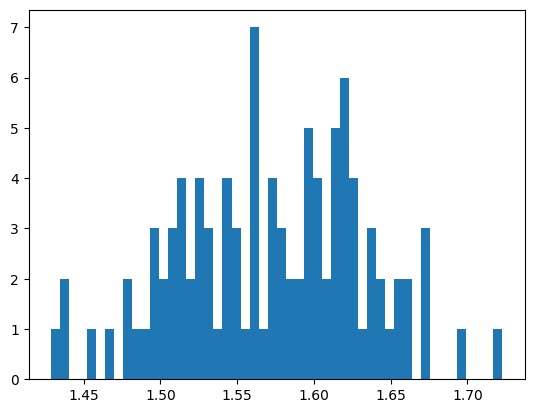

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from scipy.stats import rv_continuous

class gaussian(rv_continuous):
    def _pdf(self, x):
        normalize_factor = 2 / np.pi
        return normalize_factor * np.sin(x) ** 2 if (x >= 0 and x <= np.pi) else 0

my_distribution = gaussian(name="my_distribution", a=0.0)


# 定義した分布からサンプリング抽出
# n: サンプル数
def make_sample(n):
    return my_distribution.rvs(size=n)


# 抽出したサンプリングを算術平均
# n: サンプル数
def mean_sample(n):
    dice_results = make_sample(n)
    return np.mean(dice_results)


# グラフ表示
def show_graph(n):
    y = []
    for _ in range(0, 100):
        y.append(mean_sample(n))
    plt.hist(y, bins=50)

show_graph(100)